In [93]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
from glob import glob
plt.rcParams['axes.unicode_minus'] = False  # 표시 깨짐 방지

f_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

## 성별

In [94]:
all_xls = glob('result/전국/*.xlsx')
all_xls

['result/전국\\강원.xlsx',
 'result/전국\\경기.xlsx',
 'result/전국\\경남.xlsx',
 'result/전국\\경북.xlsx',
 'result/전국\\광주.xlsx',
 'result/전국\\대구.xlsx',
 'result/전국\\대전.xlsx',
 'result/전국\\부산.xlsx',
 'result/전국\\서울.xlsx',
 'result/전국\\세종.xlsx',
 'result/전국\\울산.xlsx',
 'result/전국\\인천.xlsx',
 'result/전국\\전남.xlsx',
 'result/전국\\전북.xlsx',
 'result/전국\\제주.xlsx',
 'result/전국\\충남.xlsx',
 'result/전국\\충북.xlsx']

In [95]:
gender_xls = glob('result/전국/*.xlsx')

gender_raw = []

for file in all_xls:
    df = pd.read_excel(file, usecols='A:C, FL:FN')
    gender_raw.append(df)
    
gender = pd.concat(gender_raw)
gender

,시도,구,연도,발생_남성,발생_알수없음,발생_여성
0,강원,강릉시,2018,685,14,219
1,강원,강릉시,2019,629,2,257
2,강원,강릉시,2020,655,3,190
3,강원,강릉시,2021,492,1,160
4,강원,강릉시,2022,492,4,216
...,...,...,...,...,...,...
50,충북,충주시,2018,1007,17,325
51,충북,충주시,2019,999,15,350
52,충북,충주시,2020,818,9,272
53,충북,충주시,2021,852,14,281


In [96]:
# 필요한 열만 가져오기
gender.drop(columns=['구','시도'], inplace=True)

gender.columns=('연도','남성','기타','여성')
sum = gender.groupby(['연도']).sum()
sum

,남성,기타,여성
연도,,,
2018,166552,4181,45395
2019,173438,4040,51253
2020,160486,3432,45027
2021,153504,2923,46082
2022,147445,2684,45987


In [97]:
df = sum.transpose()
col_sum=sum.sum()
col_sum

남성    801425
기타     17260
여성    233744
dtype: int64

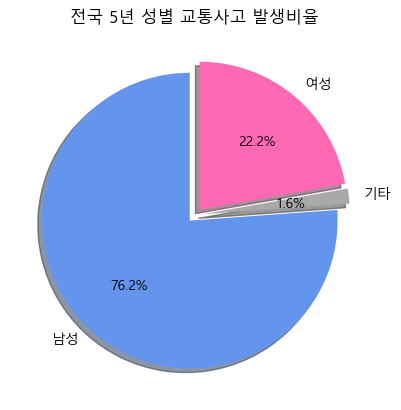

In [98]:
f, ax = plt.subplots(1,1)
col_sum.plot.pie(autopct='%1.1f%%', explode=(0.05,0.05,0.05), 
        shadow=True, startangle=90, ax=ax, colors=['cornflowerblue','darkgrey', 'hotpink'])
ax.set_title('전국 5년 성별 교통사고 발생비율')
plt.savefig("images/전국 5년 성별 교통사고 발생비율.png")
plt.show()

## 음주여부

In [99]:
col_raw = []

for file in all_xls:
    df = pd.read_excel(file, usecols='A:C, GP:GS')
    col_raw.append(df)
    
col = pd.concat(col_raw)
col

,시도,구,연도,발생_음주O,발생_음주X,사망_음주O,사망_음주X
0,강원,강릉시,2018,77,841,3,19
1,강원,강릉시,2019,78,810,3,11
2,강원,강릉시,2020,94,754,3,15
3,강원,강릉시,2021,58,595,2,15
4,강원,강릉시,2022,66,646,0,14
...,...,...,...,...,...,...,...
50,충북,충주시,2018,127,1222,3,24
51,충북,충주시,2019,94,1270,5,31
52,충북,충주시,2020,88,1011,1,20
53,충북,충주시,2021,87,1060,1,24


In [100]:
year = col.drop(columns=['시도','구'])
df = year.groupby('연도').sum()
df

,발생_음주O,발생_음주X,사망_음주O,사망_음주X
연도,,,,
2018,19315,196813,346,3430
2019,15667,213064,295,3043
2020,16266,192679,262,2811
2021,14058,188451,193,2717
2022,14240,181876,203,2529


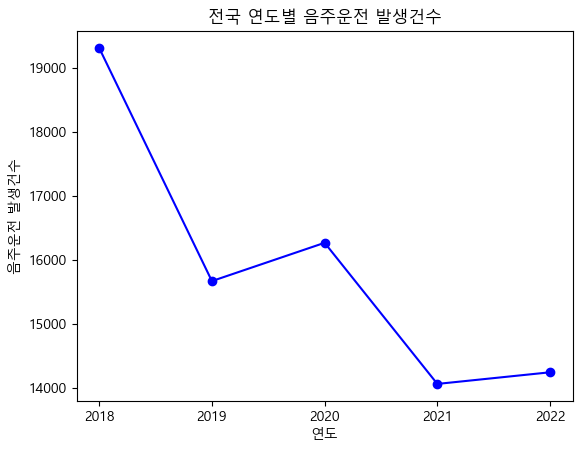

In [101]:
plt.plot(df['발생_음주O'], marker='o', color='b', linestyle='-')
plt.xlabel('연도')
plt.ylabel('음주운전 발생건수')
plt.title('전국 연도별 음주운전 발생건수')
plt.xticks(df.index)
plt.savefig("images/전국 연도별 음주운전 발생건수.png")
plt.show()

In [102]:
col.drop(columns=['구','연도'], inplace=True)
df = col.groupby(['시도']).sum().reset_index()

# 음주 발생건수가 높은 수 대로 정렬
col_sort = df.sort_values(by='발생_음주O', ascending=False)

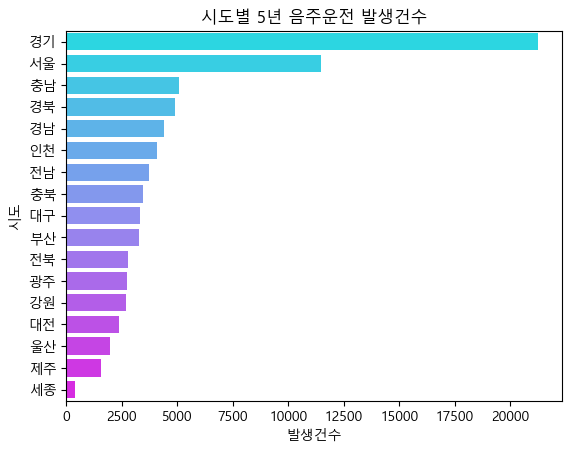

In [103]:
fig, ax = plt.subplots()
sns.barplot(data=col_sort, y='시도', x='발생_음주O', ax=ax, palette='cool')

ax.set_title('시도별 5년 음주운전 발생건수')
ax.set_xlabel('발생건수')
ax.set_ylabel('시도')

plt.savefig("images/시도별 5년 음주운전 발생건수.png")
plt.show()

In [104]:
o = round(df.sum()['사망_음주O']/df.sum()['발생_음주O']*100,2)
x = round(df.sum()['사망_음주X']/df.sum()['발생_음주X']*100,2)

a = pd.DataFrame(data ={'음주여부':['음주','비음주'], '치사율':[o,x]})
a.set_index('음주여부', inplace=True)

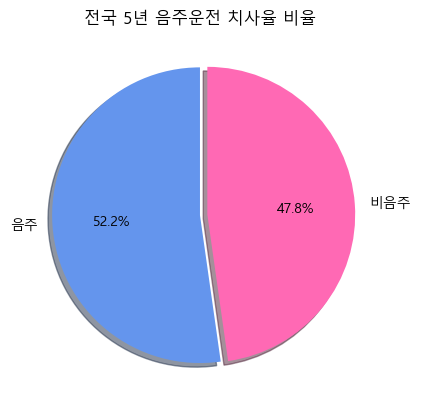

In [105]:
f, ax = plt.subplots(1,1)
a['치사율'].plot.pie(autopct='%1.1f%%', explode=(0,0.05), 
        shadow=True, startangle=90, ax=ax, colors=['cornflowerblue','hotpink'])#'mediumorchid'
ax.set_title('전국 5년 음주운전 치사율 비율')
ax.set_xlabel('')
ax.set_ylabel('')
plt.savefig("images/전국 5년 음주운전 치사율 비율.png")
plt.show()

## 시간대

In [106]:
time_raw = []

for file in all_xls:
    df = pd.read_excel(file, usecols='A:C, CT:DE')
    time_raw.append(df)
    
time = pd.concat(time_raw)
time

,시도,구,연도,발생_00~02시,발생_02~04시,발생_04~06시,발생_06~08시,발생_08~10시,발생_10~12시,발생_12~14시,발생_14~16시,발생_16~18시,발생_18~20시,발생_20~22시,발생_22~24시
0,강원,강릉시,2018,35,13,22,34,101,96,100,116,128,117,78,78
1,강원,강릉시,2019,32,12,22,36,100,87,128,98,128,132,63,50
2,강원,강릉시,2020,31,19,11,41,68,96,115,109,119,105,76,58
3,강원,강릉시,2021,13,7,5,24,62,71,79,113,94,77,56,52
4,강원,강릉시,2022,16,7,7,30,61,81,103,117,90,90,66,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50,충북,충주시,2018,41,36,25,68,133,116,144,182,173,203,140,88
51,충북,충주시,2019,44,23,28,78,135,145,152,166,184,206,130,73
52,충북,충주시,2020,26,24,17,52,115,111,142,146,134,147,106,79
53,충북,충주시,2021,27,28,21,77,136,100,125,136,159,170,108,60


In [107]:
# 필요한 열만 가져오기
time.drop(columns=['구','연도'], inplace=True)

# 열이름 변경
time.columns=('시도','02','04','06','08','10','12','14','16','18','20','22','24')

# 시도별 발생건수 합산
a = time.groupby(['시도']).sum()

b = a.transpose()
b['합계'] = b.sum(axis=1)
avg = b.div(5)
avg

시도,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북,합계
02,200.0,2010.4,361.6,369.8,341.4,454.0,338.4,473.8,1878.8,27.4,185.8,381.8,262.0,232.0,143.4,329.6,282.8,8273.0
04,89.4,1053.8,207.8,212.2,186.4,257.2,164.8,284.4,1110.4,15.6,92.0,216.6,145.0,115.2,82.2,164.4,174.6,4572.0
06,120.6,1369.4,253.2,245.0,180.8,259.0,185.4,313.4,1124.6,19.2,106.8,253.8,187.6,153.0,75.0,204.8,171.4,5223.0
08,308.6,3202.8,718.6,736.0,389.2,601.2,366.0,634.8,1774.6,52.6,302.2,461.6,555.4,384.2,215.0,531.2,502.0,11736.0
10,792.2,5488.6,1175.8,1377.0,751.6,1145.8,737.6,1112.8,3332.0,103.6,352.4,792.0,1106.8,702.2,430.6,888.6,889.4,21179.0
12,803.6,5068.4,1223.6,1439.4,704.4,1146.0,679.8,1176.4,3390.6,71.2,347.0,706.6,1143.4,692.6,444.4,874.2,855.6,20767.2
14,895.2,5517.2,1301.6,1521.8,740.6,1266.8,775.0,1305.0,3789.0,84.2,377.4,765.8,1137.2,719.8,503.8,935.2,964.4,22600.0
16,938.2,5930.8,1367.8,1610.6,830.6,1394.8,820.8,1413.2,3923.2,88.8,437.6,889.4,1203.6,777.8,546.6,1021.4,1031.8,24227.0
18,996.2,6927.4,1546.0,1787.4,991.2,1612.8,928.0,1533.2,4342.6,118.4,508.6,1031.0,1296.0,873.0,593.6,1128.8,1133.8,27348.0
20,943.6,7728.4,1636.6,1766.6,1115.4,1855.0,1101.4,1625.4,4762.0,131.8,533.4,1095.2,1234.4,877.6,581.8,1221.6,1261.4,29471.6


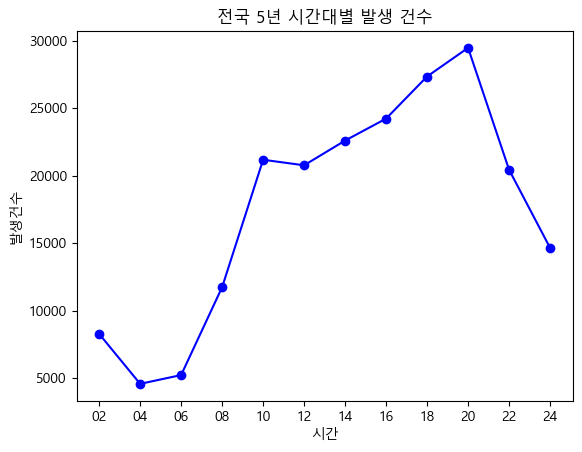

In [108]:
plt.plot(avg['합계'], marker='o', color='b', linestyle='-')
plt.xlabel('시간')
plt.ylabel('발생건수')
plt.title('전국 5년 시간대별 발생 건수')
plt.savefig("images/전국 5년 시간대별 발생 건수.png")
plt.show()

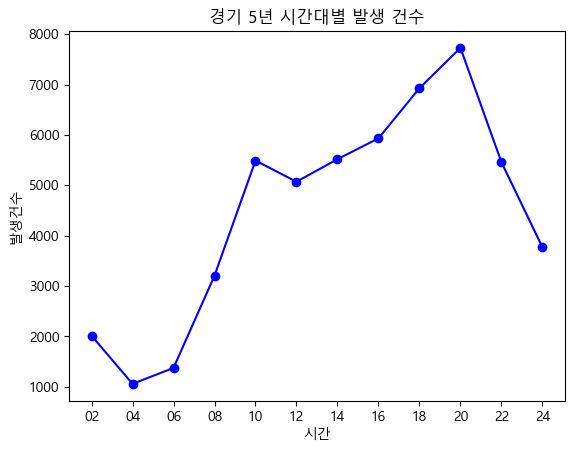

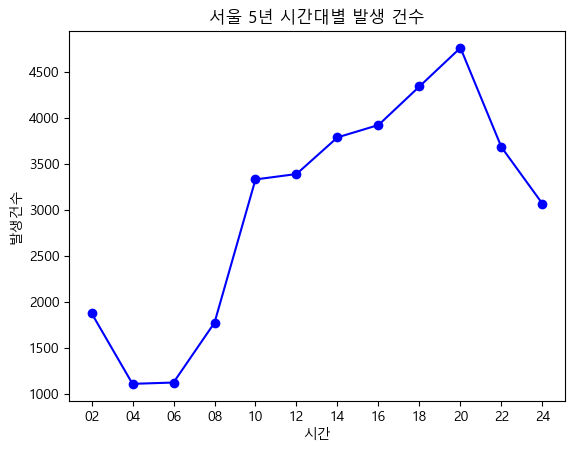

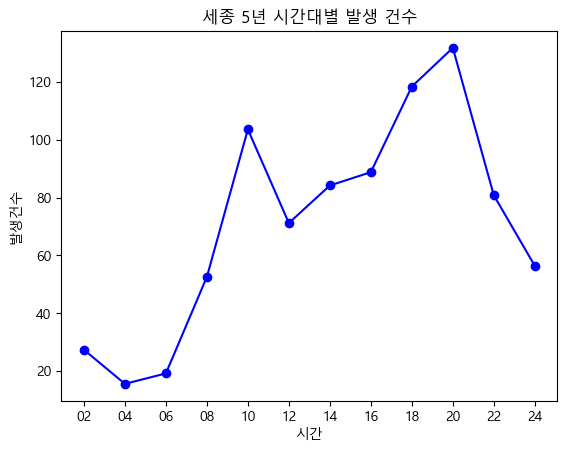

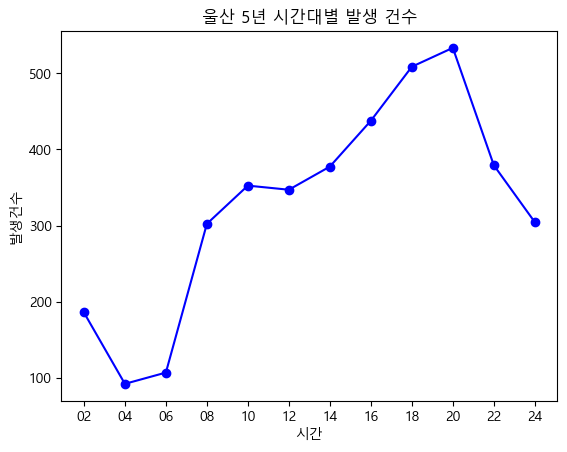

In [109]:
# 경기
# 서울 시간대별
plt.plot(avg['경기'], marker='o', color='b', linestyle='-')
plt.xlabel('시간')
plt.ylabel('발생건수')
plt.title('경기 5년 시간대별 발생 건수')
plt.savefig("images/경기 5년 시간대별 발생 건수.png")
plt.show()

# 서울 시간대별
plt.plot(avg['서울'], marker='o', color='b', linestyle='-')
plt.xlabel('시간')
plt.ylabel('발생건수')
plt.title('서울 5년 시간대별 발생 건수')
plt.savefig("images/서울 5년 시간대별 발생 건수.png")
plt.show()

# 세종 시간대별
plt.plot(avg['세종'], marker='o', color='b', linestyle='-')
plt.xlabel('시간')
plt.ylabel('발생건수')
plt.title('세종 5년 시간대별 발생 건수')
plt.savefig("images/세종 5년 시간대별 발생 건수.png")
plt.show()

# 울산 시간대별
plt.plot(avg['울산'], marker='o', color='b', linestyle='-')
plt.xlabel('시간')
plt.ylabel('발생건수')
plt.title('울산 5년 시간대별 발생 건수')
plt.savefig("images/울산 5년 시간대별 발생 건수.png")
plt.show()

In [110]:
# 서울 교통량과 비교
car_xls = glob('result/서울_교통량/서울_교통량*.txt')

car_raw = []

for file in car_xls:
    df = pd.read_csv(file, sep=' ')
    car_raw.append(df)

car = pd.concat(car_raw)
car

,시간,유입전체,도심,시계,교량,간선,도시고속,유출전체,도심.1,시계.1,교량.1,간선.1,도시고속.1
0,00~01시,126,12,27,25,41,21,142,14,34,26,45,23.0
1,01~02시,99,10,20,20,33,16,108,11,24,20,36,17.0
2,02~03시,79,8,16,16,27,12,86,9,19,16,29,13.0
3,03~04시,64,6,13,13,22,10,71,7,16,13,24,11.0
4,04~05시,66,6,15,12,22,11,71,6,18,13,22,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,19~20시,246,20,71,50,74,31,268,26,81,46,81,34.0
20,20~21시,220,18,61,44,66,31,238,23,69,40,73,33.0
21,21~22시,211,18,56,42,64,31,228,22,63,40,70,33.0
22,22~23시,181,15,45,37,56,28,199,18,55,34,62,30.0


In [111]:
# 필요행 선택
car = car.iloc[:,[0, 1, 7]]
# 교통량 구하기
car['교통량']=car.iloc[:,1]+car.iloc[:,2]
car

,시간,유입전체,유출전체,교통량
0,00~01시,126,142,268
1,01~02시,99,108,207
2,02~03시,79,86,165
3,03~04시,64,71,135
4,04~05시,66,71,137
...,...,...,...,...
19,19~20시,246,268,514
20,20~21시,220,238,458
21,21~22시,211,228,439
22,22~23시,181,199,380


In [112]:
car['시간'] = car['시간'].apply(lambda x: int(x.split('~')[0]))
car['시간대']=car['시간']//2*2
df = car.groupby('시간대').sum().div(5)
df.index=('02','04','06','08','10','12','14','16','18','20','22','24')
df

,시간,유입전체,유출전체,교통량
02,2.0,347.2,381.0,728.2
04,10.0,207.6,223.6,431.2
06,18.0,336.4,341.0,677.4
08,26.0,831.6,773.0,1604.6
10,34.0,1048.2,975.0,2023.2
12,42.0,1077.8,1040.0,2117.8
14,50.0,1074.0,1059.6,2133.6
16,58.0,1092.8,1096.0,2188.8
18,66.0,1105.6,1133.8,2239.4
20,74.0,995.4,1035.8,2031.2


In [113]:
df.drop(columns=['시간','유입전체','유출전체'], inplace=True)

p = pd.merge(avg['서울'], df['교통량'], left_index=True, right_index=True)
p

,서울,교통량
02,1878.8,728.2
04,1110.4,431.2
06,1124.6,677.4
08,1774.6,1604.6
10,3332.0,2023.2
12,3390.6,2117.8
14,3789.0,2133.6
16,3923.2,2188.8
18,4342.6,2239.4
20,4762.0,2031.2


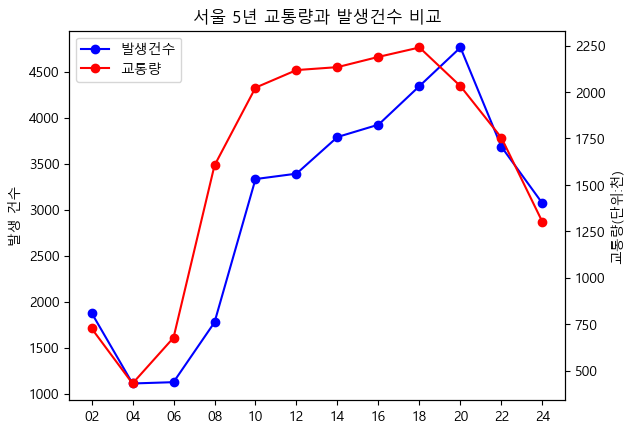

In [114]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(p.index, p['서울'], marker='o', color='b', linestyle='-', label='발생건수')
ax.set_ylabel('발생 건수')
ax.tick_params(axis='y', labelcolor='black')

ax1 = ax.twinx()
ax1.plot(p.index, p['교통량'], marker='o', color='r', linestyle='-', label='교통량')
ax1.set_ylabel('교통량(단위:천)')
ax1.tick_params(axis='y', labelcolor='black')

# 범례 항목 지정
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax1.get_legend_handles_labels()

# 범례 추가
ax.legend(lines + lines2, labels + labels2, loc='upper left')

plt.title('서울 5년 교통량과 발생건수 비교')
plt.savefig("images/서울 5년 교통량과 발생건수 비교.png")
plt.show()

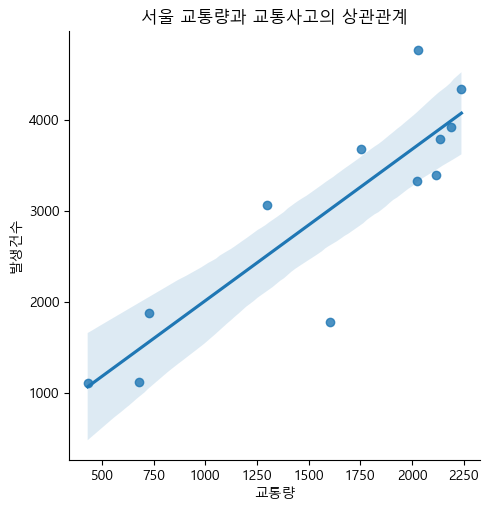

In [115]:
sns.lmplot(data=p, x='교통량', y='서울')
plt.title('서울 교통량과 교통사고의 상관관계')
plt.xlabel('교통량')
plt.ylabel('발생건수')
plt.savefig("images/서울 교통량과 교통사고의 상관관계.png")
plt.show()

In [116]:
#세종 교통량과 비교
car_xls = glob('result/세종_교통량/TrafficVolume(LINK)*.xlsx')

car_raw = []

for file in car_xls:
    df = pd.read_excel(file, 
                       usecols=(7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30), 
                       header=7)
    car_raw.append(df)

car = pd.concat(car_raw)

car = car.sum().div(4)

a = pd.DataFrame(car).reset_index(drop=True)
a['시간대']=a.index//2*2

df = a.groupby('시간대').sum()

df.index=('02','04','06','08','10','12','14','16','18','20','22','24')
df.columns = ["교통량"]

s = pd.merge(avg['세종'], df['교통량'], left_index=True, right_index=True)

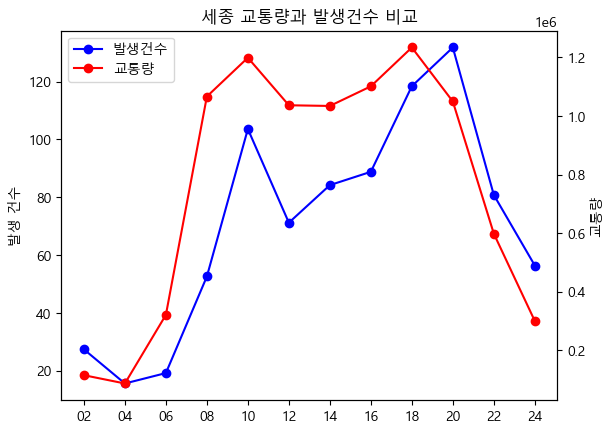

In [117]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(p.index, s['세종'], marker='o', color='b', linestyle='-', label='발생건수')
ax.set_ylabel('발생 건수')
ax.tick_params(axis='y', labelcolor='black')

ax1 = ax.twinx()
ax1.plot(p.index, s['교통량'], marker='o', color='r', linestyle='-', label='교통량')
ax1.set_ylabel('교통량')
ax1.tick_params(axis='y', labelcolor='black')

# 범례 항목 지정
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax1.get_legend_handles_labels()

# 범례 추가
ax.legend(lines + lines2, labels + labels2, loc='upper left')

plt.title('세종 교통량과 발생건수 비교')

plt.savefig("images/세종 교통량과 발생건수 비교.png")
plt.show()

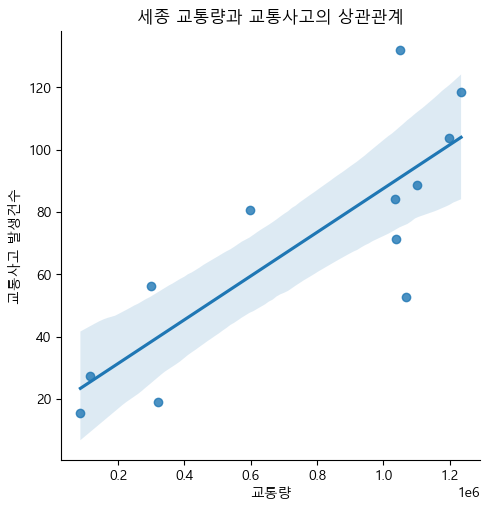

In [118]:
sns.lmplot(data=s, x='교통량', y='세종')
plt.title('세종 교통량과 교통사고의 상관관계')
plt.xlabel('교통량')
plt.ylabel('교통사고 발생건수')
plt.savefig("images/세종 교통량과 교통사고의 상관관계.png")
plt.show()

## 평일/휴일

In [119]:
week_raw=[]

for file in all_xls:
    df = pd.read_excel(file, usecols='A:C, GT:GU')
    week_raw.append(df)

week = pd.concat(week_raw)
week

,시도,구,연도,발생_평일,발생_휴일
0,강원,강릉시,2018,635,283
1,강원,강릉시,2019,601,287
2,강원,강릉시,2020,589,259
3,강원,강릉시,2021,443,210
4,강원,강릉시,2022,487,225
...,...,...,...,...,...
50,충북,충주시,2018,950,399
51,충북,충주시,2019,949,415
52,충북,충주시,2020,763,336
53,충북,충주시,2021,802,345


In [120]:
week.drop(columns=['시도','구'], inplace=True)
a = week.groupby('연도').sum()
a.reset_index(drop=False)

holiday = pd.DataFrame({
    '연도':[2018,2019,2020,2021,2022],
    '평일수':[245,247,249,252,251],
    '휴일수':[120,118,117,113,114]})

df = pd.merge(a, holiday, on='연도')

df['평일']=df['발생_평일']/df['평일수']
df['휴일']=df['발생_휴일']/df['휴일수']

a = df.iloc[:,1:5]
df.drop(columns=a, inplace=True)
df.set_index('연도', inplace=True)
df = df.transpose()
df['총합']=df.sum(axis=1)

In [121]:
df

연도,2018,2019,2020,2021,2022,총합
평일,613.281633,645.461538,590.397590,559.023810,540.665339,2948.829910
휴일,548.950000,587.305085,529.367521,545.442478,529.903509,2740.968593


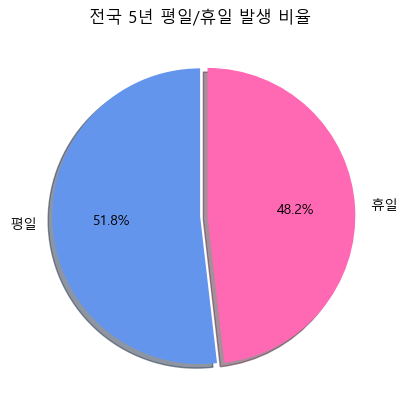

In [122]:
f, ax = plt.subplots(1,1)
df['총합'].plot.pie(autopct='%1.1f%%', explode=(0,0.05), 
        shadow=True, startangle=90, ax=ax, colors=['cornflowerblue','hotpink'])
ax.set_title('전국 5년 평일/휴일 발생 비율')
ax.set_xlabel('')
ax.set_ylabel('')
plt.savefig("images/전국 5년 평일_휴일 발생 비율.png")
plt.show()